Import the required packages

In [0]:
from fastai.vision import *

Create two variable folder & files

In [0]:
folder = 'kids'
file = 'kids.txt'

In [0]:
folder = 'adults'
file = 'adults.txt'

Connectiong Google Drive to our notebook

In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

Mounted at /content/gdrive


Creating folders for images of kids and adults

In [0]:
path = Path(base_dir + 'data/humans')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

Command to download the images

In [0]:
download_images(path/file, dest, max_pics=200)

Create the required classes (here kids & adults)

In [0]:
classes = ['kids', 'adults']

Deleting the images that are not fine or corrupted

In [0]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

Create an ImageDataBunch

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

Seeing the content of classes

In [20]:
data.classes

['adults', 'kids']

Lets see the images in the classes

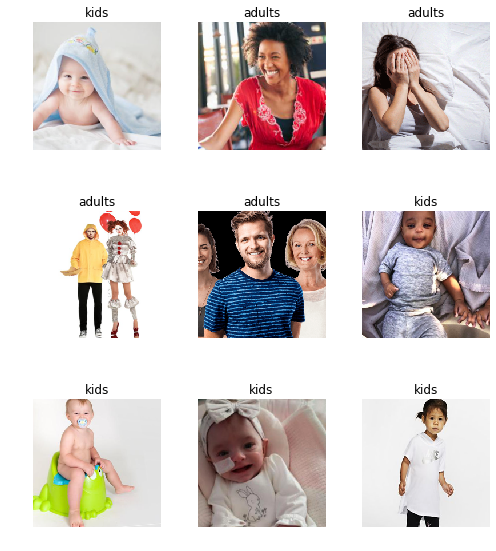

In [21]:
data.show_batch(rows=3, figsize=(7,8))

Seeing the contents such as classes, data, training data, validation data

In [22]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['adults', 'kids'], 2, 304, 75)

**Training the Model**





Create a convolutionalneuralnetwork ;) using resnet34

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Fit it to see the accuracy

In [24]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.797510,0.308675,0.120000,00:09
1,0.509748,0.066923,0.013333,00:06
2,0.366606,0.046983,0.000000,00:06
3,0.313666,0.054323,0.013333,00:06


save it

In [0]:
learn.save('stage-1')

**Fine Tuning the Model**

In [0]:
learn.unfreeze()

In [27]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


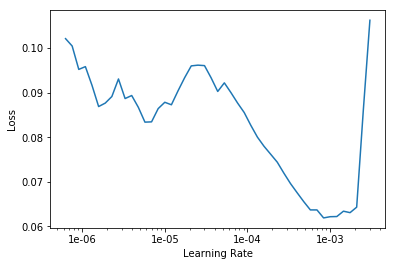

In [28]:
learn.recorder.plot()

In [40]:
learn.fit_one_cycle(2, max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.111573,0.096962,0.053333,00:07
1,0.096357,0.138890,0.106667,00:07


In [0]:
learn.save('stage-2')

**Loading models to see which works better!!!**

In [0]:
learn.load('stage-1');
#learn.load('stage-2');

**Interpretation of our model**

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

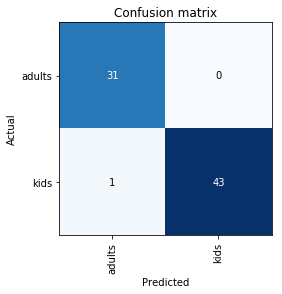

In [47]:
interp.plot_confusion_matrix()

**Putting the model into production!!!**

In [0]:
learn.export()

In [0]:
defaults.device = torch.device('cpu')

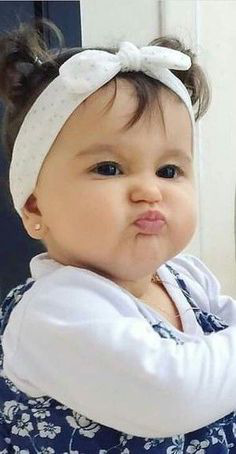

In [51]:
img = open_image(path/'kids'/'00000025.jpg')
img

In [0]:
learn = load_learner(path)

In [53]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category kids